
## Adam

* Adam combines the bet of momentum and RMSProp : Adaptive momentum estimation

* Adam involves leaky average of momentum & states 
    1. State variables as leaky averages of squared gradients
    2. Momentum as leaky average of past momentum changes

## Algorithm

$$ v_t = \beta_1 v_{t-1} + (1 - \beta_1)\nabla_t $$
$$ s_t = \beta_2 s_{t-1} + (1 - \beta_2)\nabla_t^2 $$
$$ \hat v = \frac{v}{1 - \beta_1^t},  \hat s = \frac{s}{1 - \beta_2^t} $$
$$ w_t = w_{t-1} - \frac{\eta \hat v}{\sqrt{\hat s_t} + \epsilon} $$

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
f = lambda x1, x2 : 0.1*x1**2 + 2*x2**2
gradf = lambda x1, x2 : (0.2*x1, 4*x2)

def adam_calc(x1, x2, s1, s2, v1, v2, eta):
    eps = 1e-06; beta1 = 0.9; beta2 = 0.99
    (g1, g2) = gradf(x1, x2)

    v1 = beta1*v1 + (1 - beta1)*g1
    v2 = beta1*v2 + (1 - beta1)*g2
    
    s1 = beta2*s1 + (1 - beta2)*g1**2
    s2 = beta2*s2 + (1 - beta2)*g2**2

    v1 = v1/(1 - beta1); v2 = v2/(1 - beta1)
    s1 = s1/(1 - beta2); s2 = s2/(1 - beta2)
    
    x1 -= eta* v1/(tf.math.sqrt(s1) + eps)
    x2 -= eta* v2/(tf.math.sqrt(s2) + eps)
    
    return x1, x2, s1, s2, v1, v2

def adam_desc(init_val, eta):
    x1, x2 = init_val
    s1, s2 = tf.Variable(tf.zeros(1)), tf.Variable(tf.zeros(1))
    v1, v2 = tf.Variable(tf.zeros(1)), tf.Variable(tf.zeros(1))
    results = [(x1, x2)]
    for i in range(200):
        x1, x2, s1, s2, v1, v2 = adam_calc(x1, x2, s1, s2, v1, v2, eta)
        results.append((x1, x2))
    return results

In [18]:
res_low_lr = adam_desc(init_val = [-15, -12], eta = 0.5)
res_high_lr = adam_desc(init_val = [-15, -12], eta = 2)

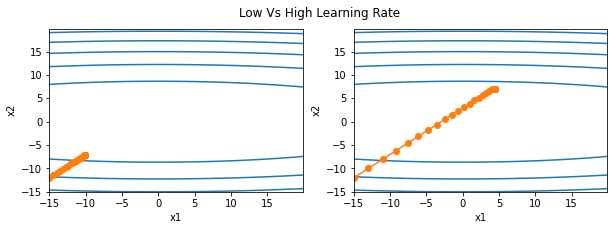

In [19]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-15, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update([res_low_lr, res_high_lr])